In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer, fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,
    accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
)

In [2]:
# Load the California Housing dataset
housing = fetch_california_housing(as_frame=True)
X = housing.data
y = housing.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display dataset information
print("Dataset Shape:", X.shape)
print("Feature Names:", housing.feature_names)

Dataset Shape: (20640, 8)
Feature Names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [3]:
# Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

In [4]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print("Linear Regression Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Linear Regression Metrics:
Mean Squared Error (MSE): 0.56
Mean Absolute Error (MAE): 0.53
R-squared (R2): 0.58


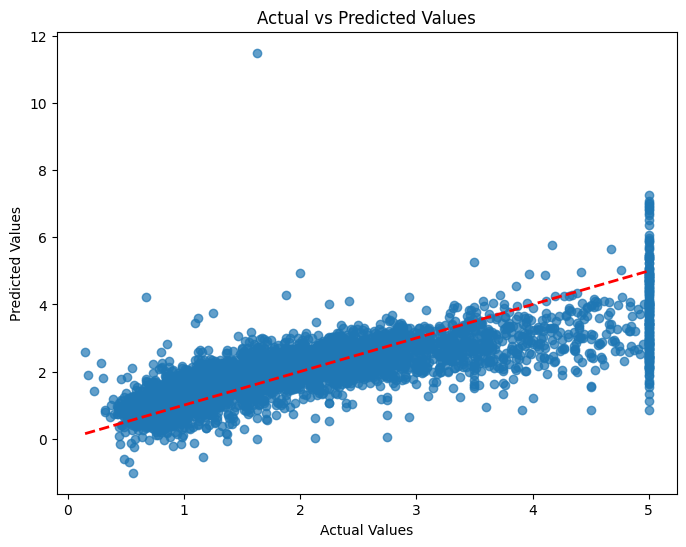

In [5]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

In [7]:
# Load the Breast Cancer dataset
cancer = load_breast_cancer(as_frame=True)
X = cancer.data
y = cancer.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display dataset information
print("Dataset Shape:", X.shape)
print("Target Classes:", cancer.target_names)

Dataset Shape: (569, 30)
Target Classes: ['malignant' 'benign']


In [8]:
# Train a Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

# Make predictions
y_pred = logreg_model.predict(X_test)
y_prob = logreg_model.predict_proba(X_test)[:, 1]

/home/astane/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification Report
class_report = classification_report(y_test, y_pred)

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_prob)

# Display results
print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)
print(f"ROC AUC Score: {roc_auc:.2f}")

Logistic Regression Metrics:
Accuracy: 0.96
Confusion Matrix:
 [[39  4]
 [ 1 70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

ROC AUC Score: 1.00


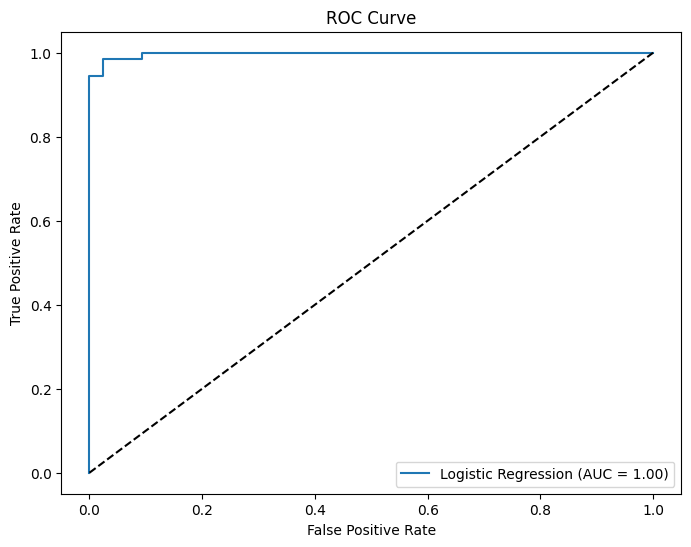

In [10]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [11]:
# Create a comparison table
comparison = pd.DataFrame({
    "Model": ["Linear Regression", "Logistic Regression"],
    "Metric": ["R-squared", "Accuracy"],
    "Value": [r2, accuracy]
})
print(comparison)

                 Model     Metric     Value
0    Linear Regression  R-squared  0.575788
1  Logistic Regression   Accuracy  0.956140


### Evaluation Metrics in Machine Learning

Evaluation metrics are used to measure the performance of machine learning models. The choice of metrics depends on the type of problem (regression, classification, or clustering) and the specific goals of the analysis.

#### 1. Regression Metrics
Regression metrics evaluate the performance of models that predict continuous values.

**a. Mean Squared Error (MSE)**  
- **Definition**: Measures the average squared difference between the predicted and actual values.  
- **Formula**:  
    \[
    MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
    \]  
- **Interpretation**: Lower values indicate better performance. Sensitive to outliers due to squaring.

**b. Mean Absolute Error (MAE)**  
- **Definition**: Measures the average absolute difference between the predicted and actual values.  
- **Formula**:  
    \[
    MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
    \]  
- **Interpretation**: Lower values indicate better performance. Less sensitive to outliers compared to MSE.

**c. R-squared (R²)**  
- **Definition**: Measures the proportion of variance in the target variable explained by the model.  
- **Formula**:  
    \[
    R^2 = 1 - \frac{\sum (y_i - \hat{y}_i)^2}{\sum (y_i - \bar{y})^2}
    \]  
- **Interpretation**: Values range from 0 to 1. Higher values indicate better performance.

#### 2. Classification Metrics
Classification metrics evaluate the performance of models that predict discrete labels.

**a. Accuracy**  
- **Definition**: Measures the proportion of correctly classified samples.  
- **Formula**:  
    \[
    Accuracy = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}}
    \]  
- **Interpretation**: Useful when the dataset is balanced. Can be misleading for imbalanced datasets.

**b. Precision**  
- **Definition**: Measures the proportion of true positive predictions out of all positive predictions.  
- **Formula**:  
    \[
    Precision = \frac{TP}{TP + FP}
    \]  
- **Interpretation**: High precision means fewer false positives.

**c. Recall (Sensitivity or True Positive Rate)**  
- **Definition**: Measures the proportion of true positives out of all actual positives.  
- **Formula**:  
    \[
    Recall = \frac{TP}{TP + FN}
    \]  
- **Interpretation**: High recall means fewer false negatives.

**d. F1-Score**  
- **Definition**: Harmonic mean of precision and recall.  
- **Formula**:  
    \[
    F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
    \]  
- **Interpretation**: Useful when there is an imbalance between precision and recall.

**e. Confusion Matrix**  
- **Definition**: A table that summarizes the performance of a classification model by showing true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN).  
- **Interpretation**: Helps visualize the types of errors made by the model.

**f. ROC-AUC (Receiver Operating Characteristic - Area Under Curve)**  
- **Definition**: Measures the trade-off between the true positive rate (TPR) and false positive rate (FPR) at different thresholds.  
- **Interpretation**: AUC values range from 0 to 1. Higher values indicate better performance.

#### 3. Clustering Metrics
Clustering metrics evaluate the performance of unsupervised learning models.

**a. Silhouette Score**  
- **Definition**: Measures how similar a sample is to its own cluster compared to other clusters.  
- **Formula**:  
    \[
    S = \frac{b - a}{\max(a, b)}
    \]  
    where:  
    \(a\): Mean intra-cluster distance.  
    \(b\): Mean nearest-cluster distance.  
- **Interpretation**: Values range from -1 to 1. Higher values indicate better-defined clusters.

**b. Davies-Bouldin Index**  
- **Definition**: Measures the average similarity ratio of each cluster with its most similar cluster.  
- **Interpretation**: Lower values indicate better clustering.

**c. Adjusted Rand Index (ARI)**  
- **Definition**: Measures the similarity between the predicted and true cluster assignments.  
- **Interpretation**: Values range from -1 to 1. Higher values indicate better clustering.

#### 4. Key Considerations
- **Balanced vs. Imbalanced Data**:  
    - For balanced datasets, accuracy is a good metric.  
    - For imbalanced datasets, use metrics like precision, recall, F1-score, or ROC-AUC.  

- **Regression vs. Classification**:  
    - Regression metrics focus on continuous predictions.  
    - Classification metrics focus on discrete predictions.  

- **Domain-Specific Metrics**:  
    - Choose metrics that align with the goals of the problem (e.g., recall for medical diagnosis, precision for fraud detection).  

#### Summary Table

| Metric                | Type           | Use Case                                      |
|-----------------------|----------------|----------------------------------------------|
| Mean Squared Error    | Regression     | Evaluate prediction errors (sensitive to outliers). |
| Mean Absolute Error   | Regression     | Evaluate prediction errors (less sensitive to outliers). |
| R-squared             | Regression     | Measure variance explained by the model.     |
| Accuracy              | Classification | Measure overall correctness of predictions.  |
| Precision             | Classification | Focus on minimizing false positives.         |
| Recall                | Classification | Focus on minimizing false negatives.         |
| F1-Score              | Classification | Balance between precision and recall.        |
| ROC-AUC               | Classification | Evaluate trade-off between TPR and FPR.      |
| Silhouette Score      | Clustering     | Measure cluster cohesion and separation.     |
| Adjusted Rand Index   | Clustering     | Compare predicted and true cluster labels.   |
